In [9]:
import numpy as np 
import pandas as pd
import os
import random
from PIL import Image
import cv2

data = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"
os.listdir(data)


['planet',
 'galaxy',
 'black hole',
 'asteroid',
 'comet',
 'star',
 'constellation',
 'nebula']

In [2]:
# Identify all classes and number of samples per class
classes = []
counts = {}

for cls in os.listdir(data):
    cls_path = os.path.join(data, cls)
    if os.path.isdir(cls_path):
        classes.append(cls)
        counts[cls] = len(os.listdir(cls_path))


print("Total number of classes: ",len(classes))
print("Classes:")
print(counts)

Total number of classes:  8
Classes:
{'planet': 1472, 'galaxy': 3984, 'black hole': 656, 'asteroid': 283, 'comet': 416, 'star': 3269, 'constellation': 1552, 'nebula': 1192}


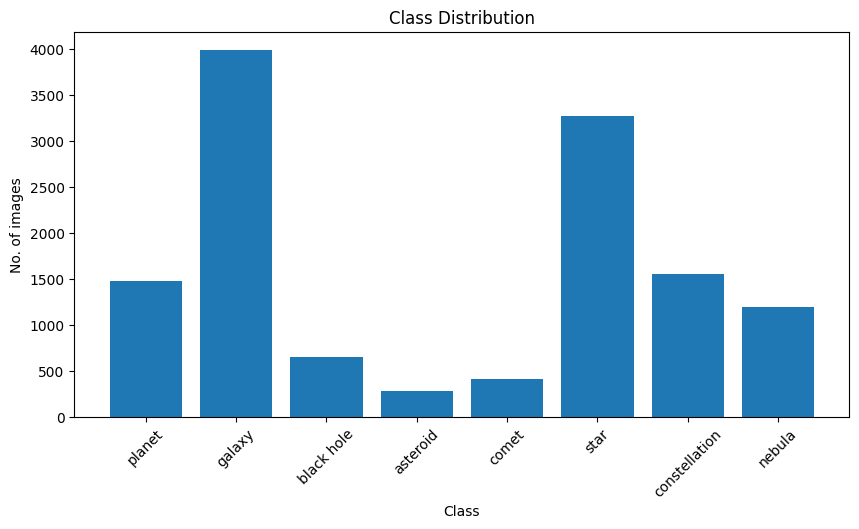

In [3]:
#Check class balance / imbalance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("No. of images")
plt.title("Class Distribution")
plt.show()


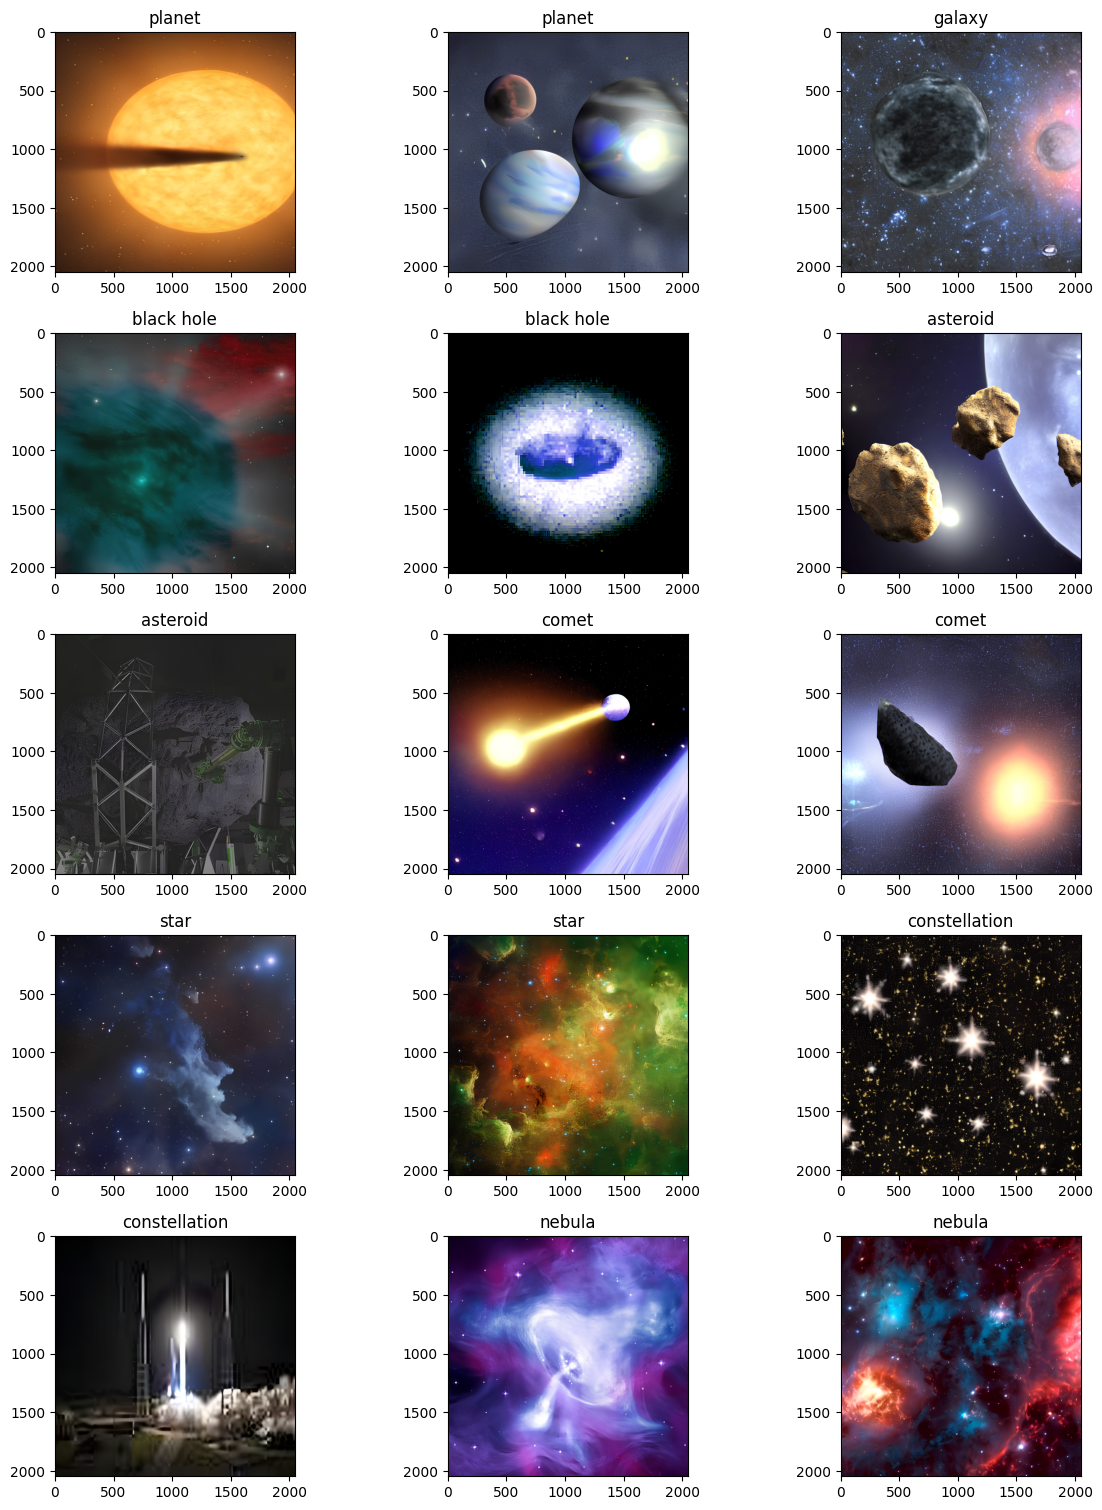

In [4]:
#checking random samples
plt.figure(figsize=(12 , len(classes)*3))
plot = 1

for class_name in classes:
    path = os.path.join(data,class_name)
    imgs = os.listdir(path)
    randomImages = random.sample(imgs , 2)

    for img in randomImages:
        imgPath = os.path.join(path , img)
        try:
            image = Image.open(imgPath)
            plt.subplot(len(classes), 3 , plot)
            plt.imshow(image)
            plt.title(class_name)
            plot = plot + 1
        except:
            pass

plt.tight_layout()
plt.show()

In [14]:
#files that are corrupt/unreadable and image format used (count)
corrupt = 0
usable_cls = {}
corrupt_cls = {}
format_count = {}
resolutions = {}

for class_name in classes:
    path = os.path.join(data, class_name)
    imgs = os.listdir(path)
    usable_cls[class_name] = 0

    for img_name in imgs:
        imgPath = os.path.join(path, img_name)
        try:
            img = Image.open(imgPath)

            # resolution
            wid, hgt = img.size
            res = f"{wid}x{hgt}"
            
            if res in resolutions:
                resolutions[res] += 1
            else:
                resolutions[res] = 1
            

            # format count
            fmt = img.format
            if fmt in format_count:
                format_count[fmt] += 1
            else:
                format_count[fmt] = 1

            usable_cls[class_name] += 1

        except:
            corrupt += 1

print("Total corrupt images:", corrupt)
for cls in classes:
    corrupt_cls[cls]=counts[cls]-usable_cls[cls]
print("Corrupt images per class: ", corrupt_cls)
print("Image formats used:", format_count)
print("Image resolutions: ",resolutions)

Total corrupt images: 1376
Corrupt images per class:  {'planet': 0, 'galaxy': 1376, 'black hole': 0, 'asteroid': 0, 'comet': 0, 'star': 0, 'constellation': 0, 'nebula': 0}
Image formats used: {'PNG': 11448}
Image resolutions:  {'2048x2048': 11448}


In [7]:
import hashlib #to use it for hashing

def file_hash(path, chunk_size=8192):  #calling data in chunks cause all at once was taking lots of time
    md5 = hashlib.md5()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(chunk_size), b""):
            md5.update(chunk)
    return md5.hexdigest()   #produces final hash for image file

hashes = {}
duplicates = []

for root,directories,files in os.walk(data):
    for file in files:

        path = os.path.join(root, file)
        try:
            h = file_hash(path)
        except:
            continue

        if h in hashes:   #checks if hash already in dict as two img with same hash will be identical
            duplicates.append((path, hashes[h]))
        else:
            hashes[h] = path

print(f"Found {len(duplicates)} duplicate pairs")


Found 1944 duplicate pairs


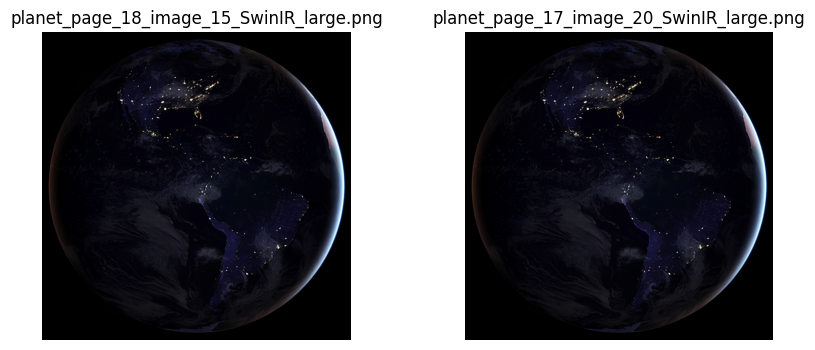

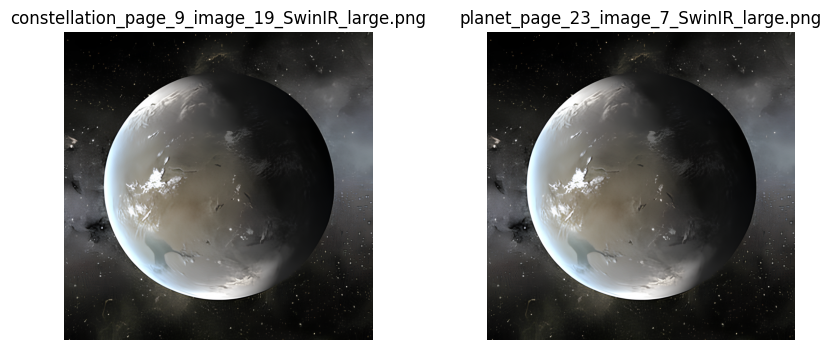

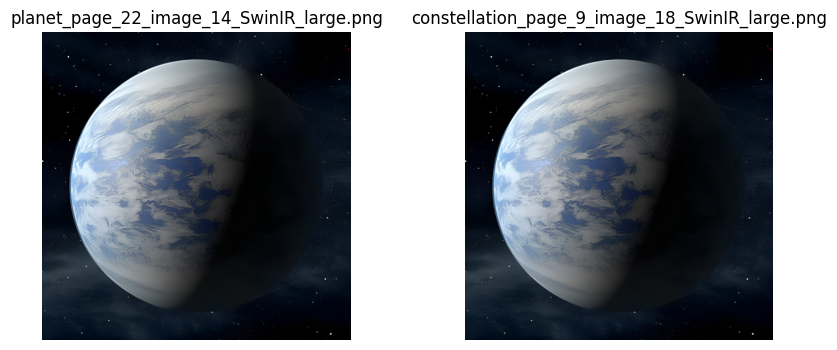

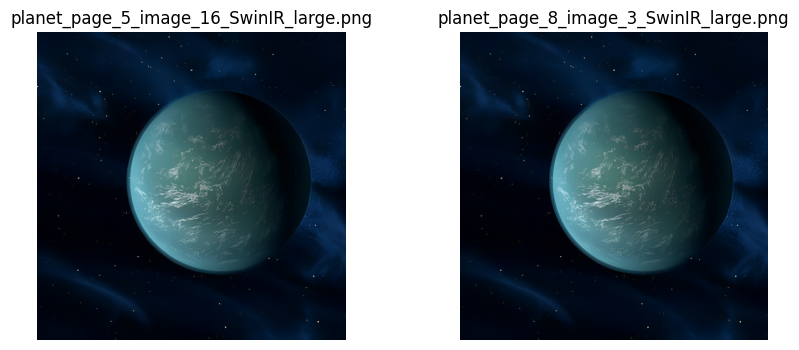

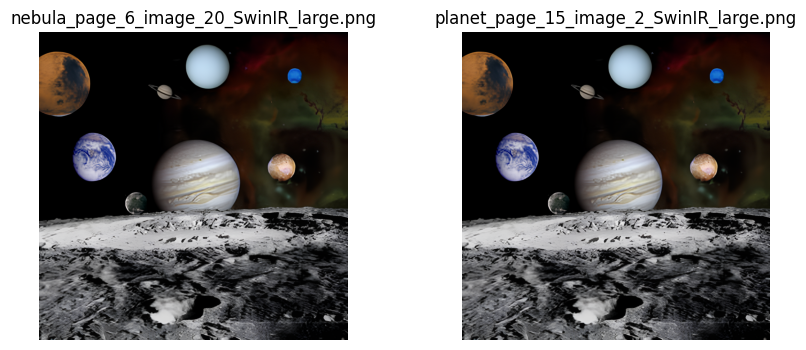

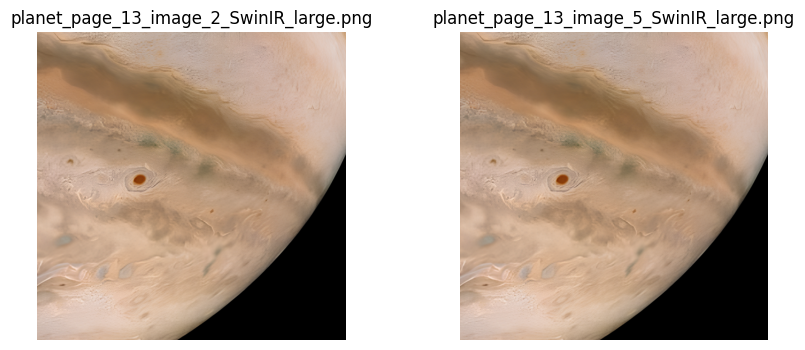

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_2_3_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_6_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png


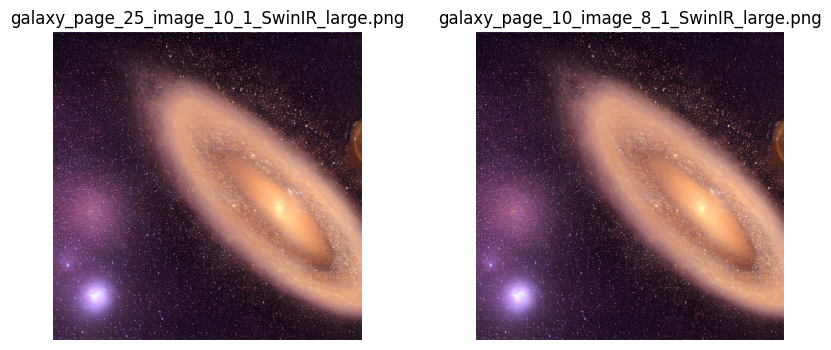

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_8_1_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_9_aug3_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_4_image_11_4_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_12_1_SwinIR_large.png /kaggle/input/spacenet-an-optim

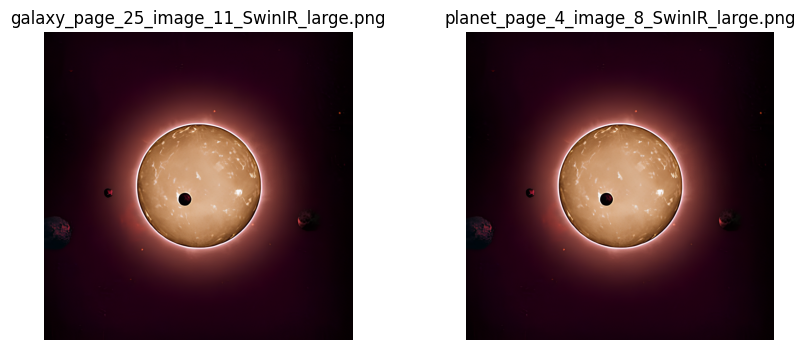

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_2_image_14_2_SwinIR_large.png /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png


In [13]:
def show_duplicate(pair):
    img1 = cv2.imread(pair[0])
    img2 = cv2.imread(pair[1])

    if img1 is None or img2 is None:
        print(pair[0], pair[1])
        return

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(os.path.basename(pair[0]))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(os.path.basename(pair[1]))
    plt.axis("off")

    plt.show()

for pair in duplicates[:20]:  
    show_duplicate(pair)

In [10]:
def is_readable(path):
    img = cv2.imread(path)
    return img is not None
valid_pairs = []
corrupt_pairs = []

for p1, p2 in duplicates:
    r1 = is_readable(p1)
    r2 = is_readable(p2)

    if r1 and r2:
        valid_pairs.append((p1, p2))
    elif not r1 and not r2:
        corrupt_pairs.append((p1, p2))

print("Total duplicate pairs found:", len(duplicates))
print("Valid (non-corrupt) duplicate pairs:", len(valid_pairs))
print("Fully corrupt duplicate pairs:", len(corrupt_pairs))

Total duplicate pairs found: 1944
Valid (non-corrupt) duplicate pairs: 569
Fully corrupt duplicate pairs: 1375


Data Analysis: In the dataset we have 8 classes with quite large variations leading to class imbalance. The dataset has some corrupted images that can not be accessed all of them in the galaxy class (1376 images). The dataset also has many duplicate images that are found by comparing their unique hash if found same they are identical and using both of them may cause data leak. The images are all png and of resolution : 2048 x 2048
Total number of images: 11448